# PROJECT NOTEBOOK PART 3
#### THIS NOTEBOOK IS DEDICATED TO MODEL BUILDING
##### 1) Preparation of The Data. (Importing, spliting Labels, Features, Training set, Test set)
##### 2) Application of StandartScaling and PCA.
##### 3) Fiting Machine Learning models to data and validation of the results.
##### 4) Building Pipelines of the models
##### 5) Comparing individual model results to an Ensemble Model (VotingClassifier)
##### 6) Deciding on a Final Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle #To retrieve the training dataframe & store the model for the next notebook.
#df = pickle.load(open(r"datasets/gtzan_df","rb")) # read binary
df = pickle.load(open(r"datasets/turkish_songs_df","rb")) # read binary

#df = df[(df.genre_label == "Turkish Rap") |(df.genre_label == "Turkish Slow")]#|(df.genre_label == "Turkish Pop") |(df.genre_label == "Turkish Rap") ]
df= df[df.genre_label !="Turkish Folk Music"]
df= df[df.genre_label !="Turkish Classical Music"]
#df= df[df.genre_label !="country"]

print(df.genre_label.value_counts())

df.describe()

Turkish Pop     99
Turkish Rock    95
Turkish Slow    80
Turkish Rap     51
Name: genre_label, dtype: int64


,rms_mean,rms_var,zcr_mean,zcr_var,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc10_var,mfcc11_var,mfcc12_var,mfcc13_var,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var
count,325.000000,325.000000,325.000000,325.000000,325.000000,3.250000e+02,325.000000,3.250000e+02,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,0.222828,0.005807,0.099465,0.004187,2395.176046,7.027937e+05,5111.444303,2.610479e+06,2515.953437,185327.128445,...,75.790237,63.833138,61.276352,58.778660,55.354286,54.484928,56.013283,57.861610,57.687790,60.703003
std,0.089137,0.004706,0.031480,0.003723,555.273199,4.546290e+05,1289.049468,1.580322e+06,363.890091,142772.144113,...,37.047066,29.319263,29.927879,25.353209,25.309401,22.828653,26.616449,28.743019,26.667400,32.759033
min,0.023502,0.000080,0.033844,0.000258,983.150403,7.230925e+04,1761.351066,2.127870e+05,1105.615193,12382.516617,...,18.313444,16.874033,18.984680,21.223644,16.945910,16.627995,17.736090,14.625222,14.295912,15.568065
25%,0.158279,0.002073,0.074410,0.001604,1945.969547,3.992397e+05,4016.292110,1.391298e+06,2249.505558,85367.859327,...,48.686920,44.616642,41.662403,40.263641,39.309345,39.693592,38.913246,37.370323,39.164909,40.241447
50%,0.235099,0.004422,0.098220,0.003294,2468.458256,6.140294e+05,5247.281882,2.209455e+06,2546.054192,142983.744767,...,67.602585,56.608643,53.642368,52.252338,50.031250,49.997570,49.366055,51.903351,53.041206,52.541328
75%,0.288496,0.008286,0.121200,0.005562,2780.408193,8.831416e+05,6028.322635,3.664666e+06,2785.121499,248698.757198,...,93.259567,74.867607,72.728882,72.342468,65.769180,63.563625,66.900429,68.815376,70.721588,73.286552
max,0.461057,0.023074,0.212612,0.027619,3693.071370,2.517378e+06,7711.509673,8.125476e+06,3164.664804,887201.639914,...,237.363907,251.470657,250.261246,156.481262,247.575302,194.680328,250.767471,244.934769,157.457001,243.864594


<AxesSubplot:>

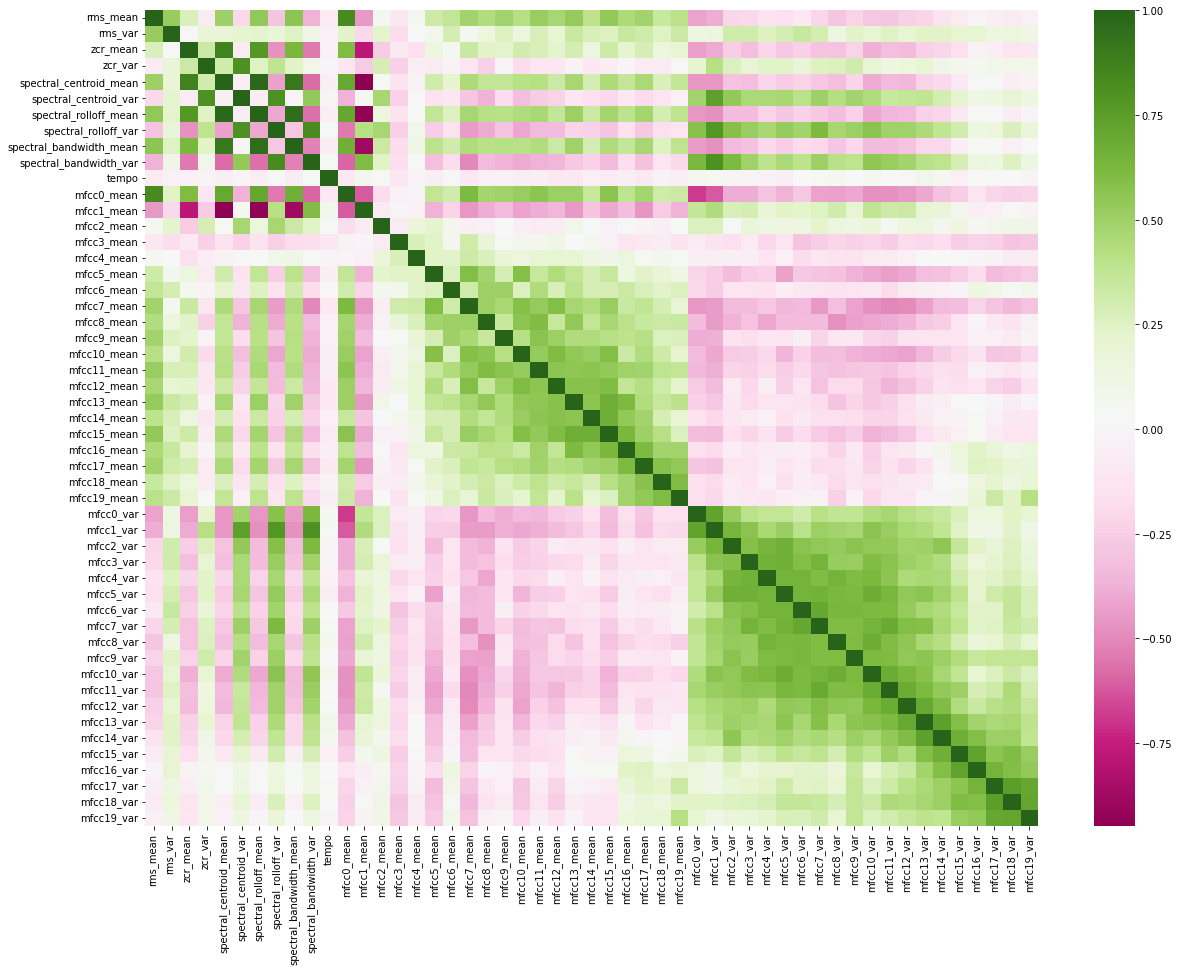

In [2]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,15)) 
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, ax = ax,cmap="PiYG")
#plt.savefig("correlation.png")

In [3]:
from sklearn.model_selection import train_test_split

features = df.drop(['file_name', 'genre_label'], axis=1).values
labels = df.genre_label.values
file_names = df.file_name.values

X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.1,stratify=labels)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [5]:
print(f"Spectral centroids         :{list(X_train[:,4][:5])}\nSpectral centroid z-scores :{list(scaled_X_train[:,4][:5])}")

Spectral centroids         :[2401.7392708899315, 2267.753338130355, 3036.3112597089084, 1784.9691438706427, 2032.1922544566244]
Spectral centroid z-scores :[-0.0003855807036451103, -0.23887835499342083, 1.1291422061542746, -1.0982263440010458, -0.6581732406801327]


Text(0.5, 0, 'Principal Component #')

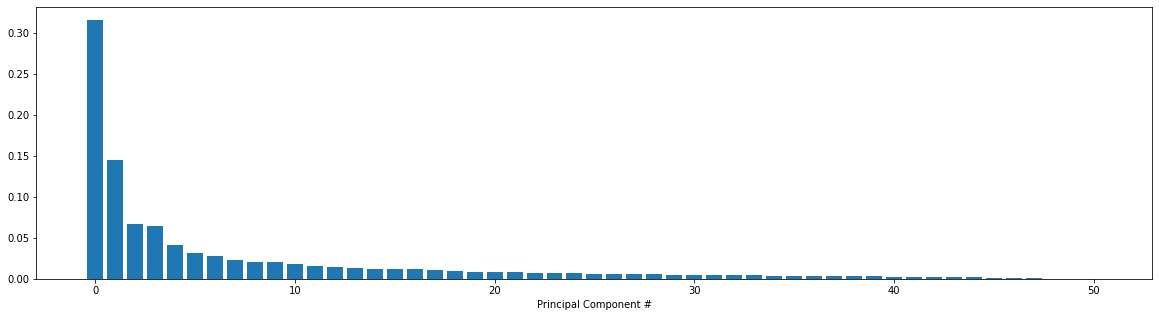

In [6]:
from sklearn.decomposition import PCA
# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_X_train)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots(figsize = (20,5))
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

Recommended Principle components : 17


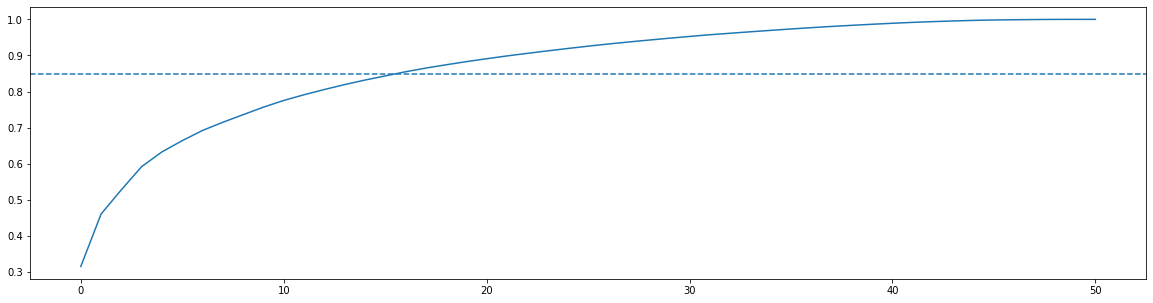

In [7]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')


recommended_pc_count = np.sum(cum_exp_variance < 0.86)

print(f"Recommended Principle components : {recommended_pc_count}")

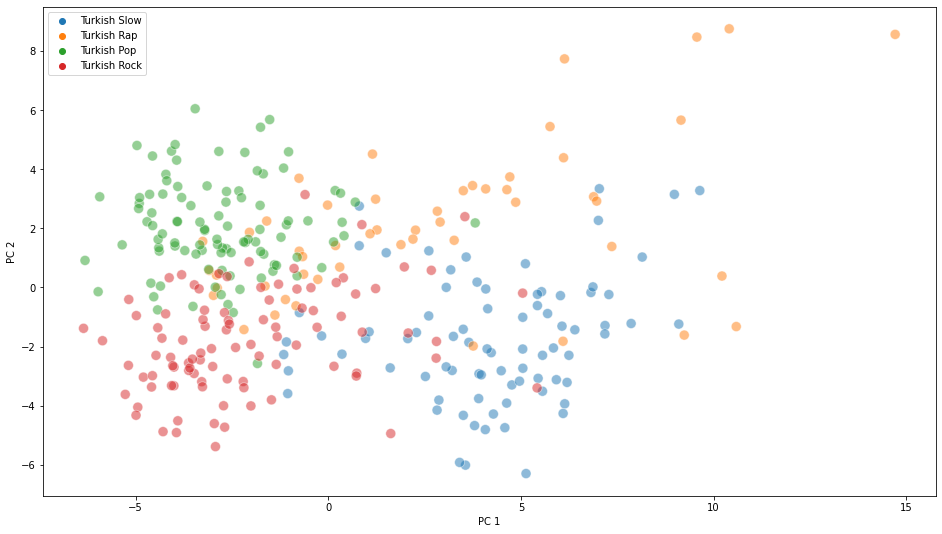

In [8]:
pca = PCA(n_components = 2)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
train_pca = pca.fit_transform(scaled_features)


pca_df = pd.DataFrame(data = train_pca, columns = ['PC 1', 'PC 2'])

plt.figure(figsize = (16, 9))


sns.scatterplot(x = "PC 1", y = "PC 2", data = pca_df, hue = labels, alpha = 0.5, s = 100);
plt.savefig("pca2_turkish.png")

In [9]:
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected = True)
cf.go_offline()

In [10]:
pca = PCA(n_components = 2)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
train_pca = pca.fit_transform(scaled_features)


pca_df = pd.DataFrame(data = train_pca, columns = ['PC 1', 'PC 2'])

df_w_pca= pd.concat([df, pca_df], axis = 1)

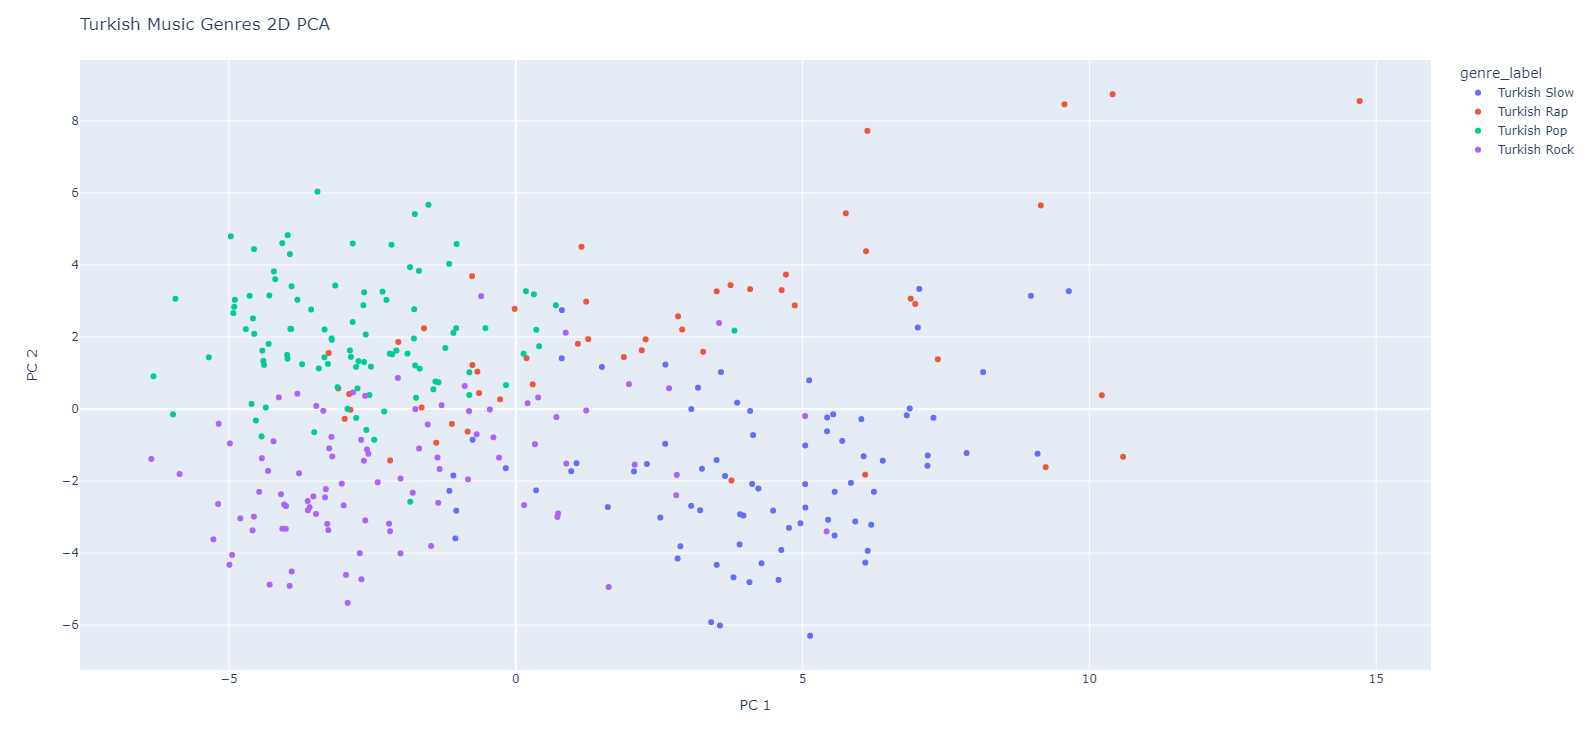

In [11]:
#fig = px.scatter_3d(df_w_pca,
#                    x = "PC 1",
#                    y ='PC 2',
#                    z ='PC 3',
#                    color = "genre_label",
#                    hover_data=['genre_label','file_name'])
#
#fig.update_layout(title = "Turkish Music Genres 3D PCA Distribution",
#                 width=1500,
#                 height=1000)
#
#fig.write_html("3D_Turkish_Songs.html")



fig = px.scatter(df_w_pca,
                    x = "PC 1",
                    y ='PC 2',
                    color = "genre_label",
                    hover_data=['genre_label','file_name'])
fig.update_layout(title = "Turkish Music Genres 2D PCA",
                 width=1250,
                 height=750)
fig.show()
                                

In [12]:
df_w_pca

,file_name,genre_label,rms_mean,rms_var,zcr_mean,zcr_var,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,...,mfcc12_var,mfcc13_var,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var,PC 1,PC 2
0,Alev Alev.wav,Turkish Slow,0.119100,0.001798,0.083800,0.002672,1963.664952,5.315930e+05,4124.232911,2.248831e+06,...,72.770164,76.979256,56.615467,65.965775,38.063232,57.948685,59.232513,94.147285,2.519466,-3.012620
1,Aşk Official Video - Gökhan Türkmen Aşk.wav,Turkish Slow,0.247212,0.002291,0.061325,0.000838,1709.639518,3.375758e+05,3702.836620,1.883325e+06,...,44.920906,32.396587,39.852821,44.881226,41.798035,26.476320,47.037804,33.852127,-1.053983,-3.591336
2,Beni Biraz Böyle Hatırla.wav,Turkish Slow,0.081898,0.004332,0.104189,0.014717,2071.472879,2.439872e+06,3911.823600,6.767129e+06,...,63.901772,61.792072,46.092957,49.192299,54.325542,69.946663,75.437584,42.512390,7.181514,-1.289855
3,Can Koç - Gökyüzünü Tutamam (Official Lyric Vi...,Turkish Slow,0.146245,0.000634,0.069388,0.001111,1850.869348,3.421683e+05,3950.918105,1.773382e+06,...,63.491627,45.299580,57.776470,40.019867,40.427750,53.649837,33.923912,40.049858,-1.157612,-2.271458
4,Can Ozan - Sar Bu Şehri.wav,Turkish Slow,0.152696,0.002779,0.045125,0.001499,1424.526526,6.597508e+05,2927.291580,3.218737e+06,...,62.395611,43.796051,33.867943,56.617340,42.344696,60.210983,42.521263,55.467621,3.795338,-4.673185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Özlem Tekin - Dağları Deldim.wav,Turkish Rock,0.176704,0.001957,0.119501,0.003294,2725.701299,3.875193e+05,5767.376185,1.512181e+06,...,127.086212,107.350037,67.385986,112.860405,105.129349,97.423851,123.335571,102.575340,-0.604730,3.135940
321,Özlem Tekin - Sen Anla.wav,Turkish Rock,0.256894,0.003031,0.119416,0.001785,2746.511650,2.399605e+05,6107.785650,9.909771e+05,...,38.047726,60.429714,43.784306,57.732090,73.324760,75.768440,73.489227,77.202080,-3.807549,0.426376
322,Şebnem Ferah Hayko Cepkin Badem TNK Aylin ...,Turkish Rock,0.213039,0.000840,0.072547,0.001554,2085.339237,4.055896e+05,4608.605079,2.016043e+06,...,64.883392,51.769985,52.595707,64.301826,44.260830,46.511024,89.626091,53.182686,-0.681972,-0.700709
323,Şebnem Ferah - Can Kırıkları.wav,Turkish Rock,0.198599,0.001356,0.174391,0.003512,3036.343828,3.380494e+05,6072.588106,1.293067e+06,...,67.922028,84.974449,65.134323,80.144669,64.425529,64.301064,78.062157,61.008980,-2.626868,0.365226


In [13]:
pca = PCA(n_components = recommended_pc_count)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_X_train)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



logreg = LogisticRegression(solver ="liblinear")
gnb = GaussianNB()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=2)
svc = SVC(gamma = 'auto',probability=True)

logreg.fit(train_pca, y_train)
gnb.fit(train_pca, y_train)
dt.fit(train_pca, y_train)
knn.fit(train_pca, y_train)
svc.fit(train_pca, y_train)

        
pred_labels_logreg = logreg.predict(test_pca)
pred_labels_gnb = gnb.predict(test_pca)
pred_labels_dt = dt.predict(test_pca)
pred_labels_knn = knn.predict(test_pca)
pred_labels_svc = svc.predict(test_pca)

### Classification Report

In [15]:
# Create the classification report for both models
from sklearn.metrics import classification_report

class_rep_logreg = classification_report(y_test,pred_labels_logreg, zero_division = 1)
print(f"Logistic Regression: \n{class_rep_logreg}\n")

class_rep_gnb = classification_report(y_test,pred_labels_gnb, zero_division = 1)
print(f"GaussianNB: \n{class_rep_gnb}\n")

class_rep_dt = classification_report(y_test,pred_labels_dt, zero_division = 1)
print(f"Decision Tree: \n{class_rep_dt}\n")

class_rep_knn = classification_report(y_test,pred_labels_knn, zero_division = 1)
print(f"K-Neigbors: \n{class_rep_knn}\n")

class_rep_svc = classification_report(y_test,pred_labels_svc, zero_division = 1)
print(f"SVC: \n{class_rep_svc}\n")

Logistic Regression: 
              precision    recall  f1-score   support

 Turkish Pop       0.83      1.00      0.91        10
 Turkish Rap       0.80      0.80      0.80         5
Turkish Rock       1.00      0.70      0.82        10
Turkish Slow       0.78      0.88      0.82         8

    accuracy                           0.85        33
   macro avg       0.85      0.84      0.84        33
weighted avg       0.87      0.85      0.85        33


GaussianNB: 
              precision    recall  f1-score   support

 Turkish Pop       0.82      0.90      0.86        10
 Turkish Rap       0.67      0.40      0.50         5
Turkish Rock       0.82      0.90      0.86        10
Turkish Slow       0.88      0.88      0.88         8

    accuracy                           0.82        33
   macro avg       0.79      0.77      0.77        33
weighted avg       0.81      0.82      0.81        33


Decision Tree: 
              precision    recall  f1-score   support

 Turkish Pop       0.7

In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

logreg_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("logreg", LogisticRegression(solver='lbfgs', max_iter=1000))])

gnb_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("gnb", GaussianNB())])

dt_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("dt", DecisionTreeClassifier())])

knn_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("knn", KNeighborsClassifier())])

svc_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("svc", SVC(probability = True))])

# Set up our K-fold cross-validation
kf = StratifiedKFold(10)

logreg_score = cross_val_score(logreg_pipe, features, labels, cv=kf)
gnb_score = cross_val_score(gnb_pipe, features, labels, cv=kf)
dt_score = cross_val_score(dt_pipe, features, labels, cv=kf)
knn_score = cross_val_score(knn_pipe, features, labels, cv=kf)
svc_score = cross_val_score(svc_pipe, features, labels, cv=kf)


# Print the mean of score arrays
print(f"Logistic Regression: {np.mean(logreg_score):.3f}")
print(f"GaussianNB: {np.mean(gnb_score):.3f}")
print(f"Decision Tree: {np.mean(dt_score):.3f}")
print(f"k-Neighbors: {np.mean(knn_score):.3f}")
print(f"SVC: {np.mean(svc_score):.3f}")


#logreg_pipe.fit(features,labels)
#coefs = logreg_pipe.named_steps["logreg"].coef_

Logistic Regression: 0.785
GaussianNB: 0.791
Decision Tree: 0.631
k-Neighbors: 0.754
SVC: 0.809


In [17]:
logreg_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=recommended_pc_count)), 
                        ("logreg", LogisticRegression(solver='lbfgs', max_iter=1000))])

gnb_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=recommended_pc_count)), 
                        ("gnb", GaussianNB())])

dt_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=recommended_pc_count)), 
                        ("dt", DecisionTreeClassifier())])

knn_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=recommended_pc_count)), 
                        ("knn", KNeighborsClassifier())])

svc_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=recommended_pc_count)), 
                        ("svc", SVC())])


# Set up our K-fold cross-validation
kf = StratifiedKFold(10)

logreg_score = cross_val_score(logreg_pipe, features, labels, cv=kf)
gnb_score = cross_val_score(gnb_pipe, features, labels, cv=kf)
dt_score = cross_val_score(dt_pipe, features, labels, cv=kf)
knn_score = cross_val_score(knn_pipe, features, labels, cv=kf)
svc_score = cross_val_score(svc_pipe, features, labels, cv=kf)


# Print the mean of score arrays
print(f"Logistic Regression: {np.mean(logreg_score):.3f}")
print(f"GaussianNB: {np.mean(gnb_score):.3f}")
print(f"Decision Tree: {np.mean(dt_score):.3f}")
print(f"k-Neighbors: {np.mean(knn_score):.3f}")
print(f"SVC: {np.mean(svc_score):.3f}")


Logistic Regression: 0.791
GaussianNB: 0.782
Decision Tree: 0.698
k-Neighbors: 0.760
SVC: 0.812


### PARAMETER TUNING

In [18]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

In [39]:
params_gnb = {'gnb__priors': [None],
             'gnb__var_smoothing': np.logspace(0,-9, num=10),"pca__n_components":[10,15,19,21,25,27,33]}
gs_gnb = GridSearchCV(gnb_pipe, 
                 param_grid=params_gnb,
                 cv=kf,
                 verbose=1, 
                 scoring='f1_micro')
gs_gnb.fit(features, labels)
print(gs_gnb.best_params_)
print(f"GaussianNB: {np.mean(gnb_score):.3f}")
print(f'Best GNB score : {gs_gnb.best_score_:.3f}')
############################################################
params_dt = {'dt__criterion':['gini','entropy'],'dt__max_depth':[11,15,20,30,90,120,150],
             "pca__n_components":[7,9,11,13,15,17,19,21,23]}
gs_dt = GridSearchCV(dt_pipe, 
                 param_grid=params_dt,
                 cv=kf,
                 verbose=1, 
                 scoring='f1_micro')
gs_dt.fit(features, labels)
print(gs_dt.best_params_)
print(f"Decision Tree: {np.mean(dt_score):.3f}")
print(f'Best dt score : {gs_dt.best_score_:.3f}')
###########################################################


Fitting 10 folds for each of 70 candidates, totalling 700 fits
{'gnb__priors': None, 'gnb__var_smoothing': 0.001, 'pca__n_components': 33}
GaussianNB: 0.663
Best GNB score : 0.676
Fitting 10 folds for each of 126 candidates, totalling 1260 fits
{'dt__criterion': 'entropy', 'dt__max_depth': 15, 'pca__n_components': 15}
Decision Tree: 0.551
Best dt score : 0.614


In [25]:
logreg_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("logreg", LogisticRegression(solver='lbfgs', max_iter=1000))])

params_logreg={"logreg__C":np.logspace(-3,3,7), 
               "logreg__penalty":["l1","l2"],"logreg__solver":['liblinear','lbfgs'],"logreg__max_iter" : [1000]} 

gs_logreg = GridSearchCV(logreg_pipe, 
                 param_grid=params_logreg,
                 cv=kf,
                 verbose=1, 
                 scoring='accuracy')
gs_logreg.fit(features, labels)
print(gs_logreg.best_params_)
print(f"Logistic Regression: {np.mean(logreg_score):.3f}")
print(f'Best logreg score : {gs_logreg.best_score_:.3f}')


Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'logreg__C': 0.1, 'logreg__max_iter': 1000, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Logistic Regression: 0.791
Best logreg score : 0.819


In [59]:
params_svc = {'svc__C': [0.001,0.01,0.1,1, 100,1000],    #6*4*3 = 72 
              'svc__gamma': [0.1,0.01,0.001],
              "pca__n_components":[19,26,27,28],
              "svc__probability": [True]}
gs_svc = GridSearchCV(svc_pipe, 
                 param_grid=params_svc,
                 cv=kf,
                 verbose=1, 
                 scoring='accuracy')

gs_svc.fit(features, labels)
print(gs_svc.best_params_)
print(f"SVC: {np.mean(svc_score):.3f}")
print(f'Best svc score : {gs_svc.best_score_:.3f}')

Fitting 10 folds for each of 72 candidates, totalling 720 fits
{'pca__n_components': 19, 'svc__C': 100, 'svc__gamma': 0.001, 'svc__probability': True}
SVC: 0.989
Best svc score : 0.989


In [51]:
knn_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA()), 
                        ("knn", KNeighborsClassifier())])

params_knn = {'knn__n_neighbors' : list(range(1, 31,2)),'knn__weights':['uniform', 'distance'],
              "pca__n_components":[15,17,19,21]}
gs_knn = GridSearchCV(knn_pipe, 
                 param_grid=params_knn,
                 cv=kf,
                 verbose=1, 
                 scoring='accuracy')
#gs_knn.fit(features, labels)
#print(gs_knn.best_params_)
#print(f"k-Neighbors: {np.mean(knn_score):.3f}")
#print(f'Best knn score : {gs_knn.best_score_:.3f}')
#################################################################

knn_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=45)), 
                        ("knn", KNeighborsClassifier(n_neighbors=7,weights='distance'))])
knn_pipe.fit(X_train,y_train)
pred_labels_knn = knn_pipe.predict(X_test)
class_rep_knn = classification_report(y_test,pred_labels_knn, zero_division = 1)
print(f"KNN (on test data): \n{class_rep_knn}\n")


KNN (on test data): 
                         precision    recall  f1-score   support

Turkish Classical Music       0.71      0.83      0.77         6
     Turkish Folk Music       0.80      0.67      0.73         6
            Turkish Pop       0.90      0.90      0.90        10
            Turkish Rap       1.00      0.80      0.89         5
           Turkish Rock       0.80      0.80      0.80        10
           Turkish Slow       0.78      0.88      0.82         8

               accuracy                           0.82        45
              macro avg       0.83      0.81      0.82        45
           weighted avg       0.83      0.82      0.82        45




In [55]:
svc_pipe = Pipeline([("scaler", StandardScaler()),("pca", PCA(n_components=19)), 
                     ("svc", SVC(C=100, gamma =0.001, probability = True))])             
svc_pipe.fit(X_train,y_train)


pred_labels_svc = svc_pipe.predict(features)
class_rep_svc = classification_report(labels,pred_labels_svc, zero_division = 1)
print(f"SVC (on train + test data): \n{class_rep_svc}\n")


pred_labels_svc = svc_pipe.predict(X_test)
class_rep_svc = classification_report(y_test,pred_labels_svc, zero_division = 1)
print(f"SVC (on test data): \n{class_rep_svc}\n")

###############################################################
logreg_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("logreg", LogisticRegression(C= 1.0, max_iter =  1000, penalty ='l2',solver= 'lbfgs'))])
logreg_pipe.fit(X_train,y_train)
pred_labels_logreg = logreg_pipe.predict(X_test)
class_rep_logreg = classification_report(y_test,pred_labels_logreg, zero_division = 1)
print(f"Logistic Regression (on test data): \n{class_rep_logreg}\n")


SVC (on train + test data): 
                         precision    recall  f1-score   support

Turkish Classical Music       0.86      0.82      0.84        62
     Turkish Folk Music       0.81      0.72      0.77        61
            Turkish Pop       0.89      0.94      0.92        99
            Turkish Rap       0.88      0.69      0.77        51
           Turkish Rock       0.75      0.86      0.80        95
           Turkish Slow       0.90      0.93      0.91        80

               accuracy                           0.85       448
              macro avg       0.85      0.83      0.84       448
           weighted avg       0.85      0.85      0.84       448


SVC (on test data): 
                         precision    recall  f1-score   support

Turkish Classical Music       0.83      0.83      0.83         6
     Turkish Folk Music       0.50      0.67      0.57         6
            Turkish Pop       1.00      0.90      0.95        10
            Turkish Rap       1.00 

In [57]:
import pickle
outfile = open(r"datasets/model_turkish_knn",'wb') #write binary
pickle.dump(knn_pipe,outfile)
outfile.close()

Logistic Regression (on test data): 
              precision    recall  f1-score   support

 Turkish Rap       0.83      1.00      0.91         5
Turkish Slow       1.00      0.89      0.94         9

    accuracy                           0.93        14
   macro avg       0.92      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14


                  feature      coef  abs_coef
21            mfcc10_mean -0.399448  0.399448
3                 zcr_var  0.344351  0.344351
33              mfcc2_var -0.304099  0.304099
26            mfcc15_mean -0.301130  0.301130
6   spectral_rolloff_mean -0.291510  0.291510



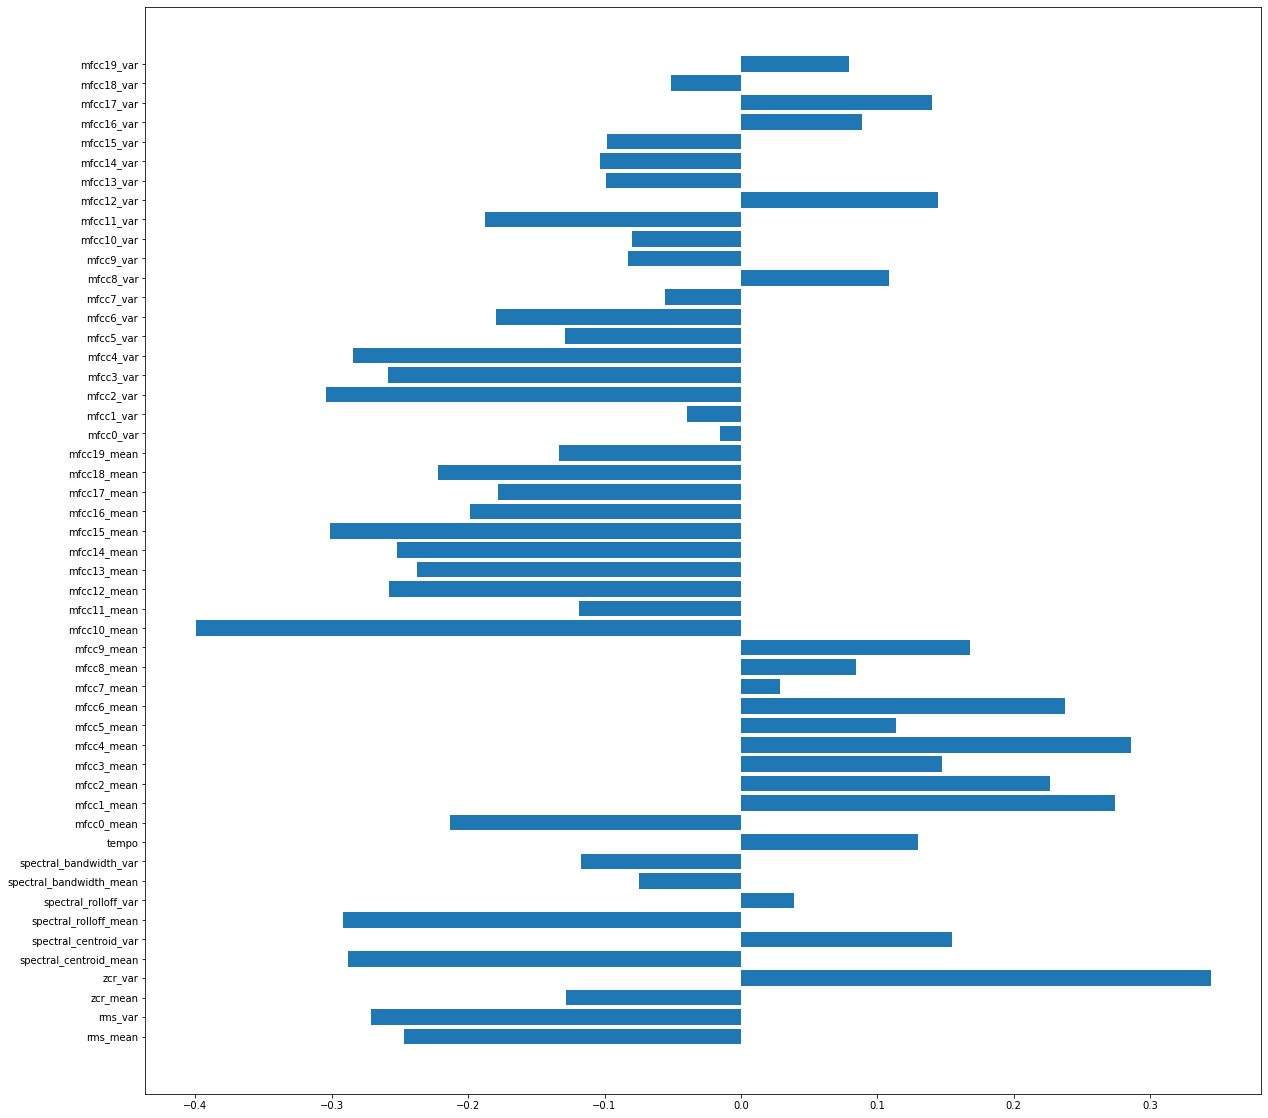

In [77]:
logreg_pipe = Pipeline([("scaler", StandardScaler()), 
                        ("logreg", LogisticRegression(C= 0.1, max_iter =  1000,
                                                      penalty ='l2',solver= 'lbfgs'))])

logreg_pipe.fit(X_train,y_train)
pred_labels_logreg = logreg_pipe.predict(X_test)
class_rep_logreg = classification_report(y_test,pred_labels_logreg, zero_division = 1)
print(f"Logistic Regression (on test data): \n{class_rep_logreg}\n")

feature_coefs =logreg_pipe["logreg"].coef_[0]

coefs = pd.DataFrame(list(zip(df.columns[2:],feature_coefs))
                     ,columns=["feature","coef"])


plt.figure(figsize=(20,20))
plt.barh(coefs["feature"],coefs["coef"])
plt.savefig("Features.png")


coefs["abs_coef"]=coefs.coef.apply(abs)
coefs = coefs.sort_values(by="abs_coef",ascending = False)
print(coefs.head(5))
print()

In [81]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp =confusion_matrix(y_test,pred_labels_logreg).ravel()

tp

8

In [70]:
from sklearn.ensemble import VotingClassifier

classifiers =[("Logistic Regression",logreg_pipe),
              ("K-Neigbors",knn_pipe),
              ("SVC", svc_pipe)]

ensemble = VotingClassifier(estimators=classifiers,voting="soft")


ensemble.fit(X_train,y_train)
pred_labels_ensemble = ensemble.predict(X_test)
class_rep_ensemble = classification_report(y_test,pred_labels_ensemble, zero_division = 1)

print(f"VotingClassifier (on test data): \n{class_rep_ensemble}\n")



ensemble.fit(X_train,y_train)
pred_labels_ensemble = ensemble.predict(X_train)
class_rep_ensemble = classification_report(y_train,pred_labels_ensemble, zero_division = 1)

print(f"VotingClassifier (on train data): \n{class_rep_ensemble}\n")


VotingClassifier (on test data): 
                         precision    recall  f1-score   support

Turkish Classical Music       0.83      0.83      0.83         6
     Turkish Folk Music       0.62      0.83      0.71         6
            Turkish Pop       0.90      0.90      0.90        10
            Turkish Rap       1.00      1.00      1.00         5
           Turkish Rock       0.75      0.60      0.67        10
           Turkish Slow       0.88      0.88      0.88         8

               accuracy                           0.82        45
              macro avg       0.83      0.84      0.83        45
           weighted avg       0.83      0.82      0.82        45


VotingClassifier (on train data): 
                         precision    recall  f1-score   support

Turkish Classical Music       0.98      0.98      0.98        56
     Turkish Folk Music       1.00      0.96      0.98        55
            Turkish Pop       1.00      0.98      0.99        89
            Turk

In [64]:
outfile = open(r"datasets/model_turkish_ensemble",'wb') #write binary
pickle.dump(ensemble,outfile)
outfile.close()

# XGBOOST & GRADIENT BOOSTED RANDOM FOREST DEMO

In [43]:
genre_num = {'Turkish Pop':0 ,'Turkish Rap':1, 'Turkish Rock':2, 'Turkish Slow':3}
#genre_num_r ={0:'Turkish Pop' ,1:'Turkish Rap',2:'Turkish Rock', 3:'Turkish Slow'}
alt=[]
labels
#
for i in labels:
    alt.append(genre_num[i])
    
alt_label  = np.array(alt)

In [ ]:
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance



xgb_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=recommended_pc_count)), 
                        ("XGB", XGBClassifier(objective= 'binary:logistic',
                                              nthread=4,
                                              seed=42 ))])

params_xgb = {'XGB__max_depth': range (2, 10, 1),
              'XGB__n_estimators': range(60, 220, 40),
              'XGB__learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
              'XGB__min_child_weight': [1, 5, 10],
              'XGB__gamma': [0.5, 1, 1.5, 2, 5],
              'XGB__subsample': [0.6, 0.8, 1.0],
              'XGB__colsample_bytree': [0.6, 0.8, 1.0],
              'XGB__max_depth': [3, 4, 5]}
        

gs_xgb = GridSearchCV(xgb_pipe, 
                 param_grid=params_xgb,
                 cv=kf,
                 verbose=1, 
                 scoring='accuracy')

gs_xgb.fit(features, alt_label)
print(gs_svc.best_params_)
print(f"XGB: {np.mean(xgb_score):.3f}")
print(f'Best svc score : {gs_XGB.best_score_:.3f}')


Fitting 10 folds for each of 192 candidates, totalling 1920 fits
